In [28]:
#Za primjer 4.2. iz priloga koristite veći broj dodatnih veličina u modelu (npr., degree=15). Međutim, umjesto obične
#linearne regresije koristite Ridge regresiju. Mijenjate vrijednost regularizacijskog parametar. Što primjećujete? Kako
#glase koeficijenti ovog modela, a kako modela iz zadatka 7 za degree = 15. Komentirajte dobivene rezultate. 
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

def non_func(x):
 y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
 return y
def add_noise(y):
 np.random.seed(14)
 varNoise = np.max(y) - np.min(y)
 y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
 return y_noisy

x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]
# make polynomial features
poly = PolynomialFeatures(degree=15)
xnew = poly.fit_transform(x)

np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]
xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]
xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]

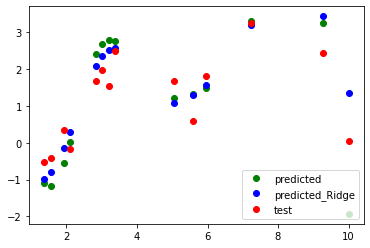

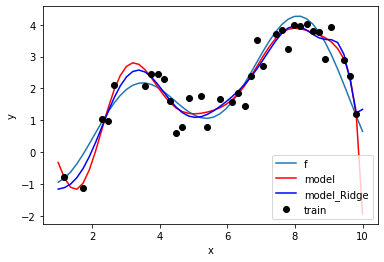

In [34]:
model = lm.Ridge()
model.fit(xtrain, ytrain)
linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)
ytest_p = linearModel.predict(xtest)
ytest_p_model = model.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)
MSE_test_model = mean_squared_error(ytest, ytest_p_model)

plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest_p_model,'ob',label='predicted_Ridge')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)
#pozadinska funkcija vs model
plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel.predict(xnew),'r-',label='model')
plt.plot(x, model.predict(xnew),'b-',label='model_Ridge')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4)

In [35]:
linearModel_params = linearModel.coef_
np.append(linearModel_params, linearModel.intercept_)
model_Ridge_params = model.coef_
np.append(model_Ridge_params, model.intercept_)
print("Vrijednosti theta iz linearnog modela regresije:")
print(linearModel_params)
print("Vrijednosti theta iz Ridge linearnog modela")
print(model_Ridge_params)

Vrijednosti theta iz linearnog modela regresije:
[[ 0.00000000e+00 -7.91328818e-01 -1.31577194e+00 -1.14536501e+00
  -2.05030522e-02  1.13345361e+00  4.45106940e-01 -1.23135880e+00
   7.57073553e-01 -2.49076632e-01  5.12356048e-02 -6.92952098e-03
   6.18968979e-04 -3.52709431e-05  1.16435693e-06 -1.69732926e-08]]
Vrijednosti theta iz Ridge linearnog modela
[[ 0.00000000e+00 -6.67780977e-02 -1.07033458e-01 -8.52824176e-02
   1.98958355e-02  1.27055238e-01  6.84578951e-02 -1.01572235e-01
   2.82451747e-02  2.27278031e-03 -2.92381152e-03  7.34879211e-04
  -9.63607135e-05  7.25346795e-06 -2.97751007e-07  5.18849001e-09]]
